# Tutorial-4: Monte Carlo simulation of Ising model on honeycomb lattice

In [1]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import spintoolkit_py as sptk

## Print system information (optional)

In [2]:
sptk.print_system_info()

Hostname:                d196575d6e36
CPU Type:                12th Gen Intel(R) Core(TM) i9-12900
Thread count:            16
Platform:                linux
Time Now:                2026-02-05---05:30:41.359---UTC

OMP version:             202011
OMP bind policy:         false
OMP number of procs:     16
OMP number of threads:   1
OMP number of devices:   0

Boost lib version:       1_83
NLopt version:           2.7.1
SPGlib version:          2.3.1
SpinToolkit Compiled by: Clang version 18.1.3 (1ubuntu1) (-O1, -O2, -O3) on Feb  3 2026
SpinToolkit version:     1.6.0



## Honeycomb lattice

In [3]:
latt = sptk.lattice(name = "honeycomb", l = [30, 30])

L = latt.total_sites()

Honeycomb lattice built.
L       = 1800
num_sub = 2
dim     = 2
Real space basis (a):                              
a0: [                   1                   0]
a1: [                -0.5           0.8660254]
Reciprocal space basis (b / 2π):                   
b0: [                   1           0.5773503]
b1: [                   0            1.154701]
Superlattice real space basis (A) [unit: a]:       
A0: [                  30                   0]
A1: [                   0                  30]
Superlattice reciprocal space basis (B) [unit: b]: 
B0: [          0.03333333                   0]
B1: [                   0          0.03333333]
Sublattice positions [unit: a]: 
sub[    0] = [              0              0]
sub[    1] = [      0.6666667      0.3333333]
Minimal bond length: 0.5773503



## Define the model and include magnetic couplings

In [4]:
J1 = -1.0
J2 = 1.5
J3 = 0.5

hamiltonian = sptk.model_spin(S = 0.5, mode = "dipole", lattice = latt)
print()

for site_i in range(L):
    coor_i, sub_i = latt.site2coor(site = site_i)
    coor0_i, r̃i   = latt.r2superlattice(coor = coor_i)
    xi = coor_i[0]
    yi = coor_i[1]

    # J1 terms
    if sub_i == 0:
        coor_j      = [xi, yi]
        coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
        site_j      = latt.coor2site(coor = coor_j, sub = 1)
        hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J1),
                                  site_i = site_i, site_j = site_j,
                                  rtilde_i = r̃i, rtilde_j = r̃j)

        coor_j      = [xi - 1, yi]
        coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
        site_j      = latt.coor2site(coor = coor_j, sub = 1)
        hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J1),
                                  site_i = site_i, site_j = site_j,
                                  rtilde_i = r̃i, rtilde_j = r̃j)

        coor_j      = [xi - 1, yi - 1]
        coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
        site_j      = latt.coor2site(coor = coor_j, sub = 1)
        hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J1),
                                  site_i = site_i, site_j = site_j,
                                  rtilde_i = r̃i, rtilde_j = r̃j)

    # J2 terms
    coor_j      = [xi + 1, yi]
    coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
    site_j      = latt.coor2site(coor = coor_j, sub = sub_i)
    hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J2),
                              site_i = site_i, site_j = site_j,
                              rtilde_i = r̃i, rtilde_j = r̃j)

    coor_j      = [xi + 1, yi + 1]
    coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
    site_j      = latt.coor2site(coor = coor_j, sub = sub_i)
    hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J2),
                              site_i = site_i, site_j = site_j,
                              rtilde_i = r̃i, rtilde_j = r̃j)

    coor_j      = [xi, yi + 1]
    coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
    site_j      = latt.coor2site(coor = coor_j, sub = sub_i)
    hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J2),
                              site_i = site_i, site_j = site_j,
                              rtilde_i = r̃i, rtilde_j = r̃j)

    # J3 terms
    if sub_i == 0:
        coor_j      = [xi, yi - 1]
        coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
        site_j      = latt.coor2site(coor = coor_j, sub = 1)
        hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J3),
                                  site_i = site_i, site_j = site_j,
                                  rtilde_i = r̃i, rtilde_j = r̃j)

        coor_j      = [xi, yi + 1]
        coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
        site_j      = latt.coor2site(coor = coor_j, sub = 1)
        hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J3),
                                  site_i = site_i, site_j = site_j,
                                  rtilde_i = r̃i, rtilde_j = r̃j)

        coor_j      = [xi - 2, yi - 1]
        coor0_j, r̃j = latt.r2superlattice(coor = coor_j)
        site_j      = latt.coor2site(coor = coor_j, sub = 1)
        hamiltonian.add_2spin_XYZ(J = sptk.Vec3(0.0, 0.0, J3),
                                  site_i = site_i, site_j = site_j,
                                  rtilde_i = r̃i, rtilde_j = r̃j)

hamiltonian.simplify().build_mc_list()
print()

Model with S=1/2 (mode = dipole) initialized.

simplifying bond_Jij:              10800     ----->      10800,	 elapsed time: 0.001947974s.
building interaction list for MC... 0.001417413s.
Average coordination (bilinear) per site:     12
Average coordination (biquadratic) per site:  0
Number of onsite anisotropy:                  0
Number of CEF terms:                          0
Number of Zeeman terms:                       0
E_shift/L:                                    0



## Create a folder *dump* for logging the results

In [5]:
dump_dir = "dump"
if os.path.exists(dump_dir):
    shutil.rmtree(dump_dir)
os.makedirs(dump_dir)

with open(os.path.join(dump_dir, "energy.dat"), "w") as foutE:
    foutE.write(f"{'#(1)':>20}{'(2)':>20}{'(3)':>20}\n")
    foutE.write(f"{'time':>20}{'E':>20}{'mz':>20}\n")
foutE.close()

with open(os.path.join(dump_dir, "total_sites.dat"), "w") as foutL:
    foutL.write(f"{L}\n")
foutL.close()

## Monte Carlo parameters

In [6]:
seed = 0                            # random seed
T    = 0.4                          # final temperature
T0   = 1.0                          # initial temperature of annealing

max_sweeps      = 200000
sweeps_anneal   = max_sweeps // 4
log_interval    = 50                # frequency of doing measurements
sweeps_per_dump = 10000             # frequency of taking snapshots

alpha_anneal = np.exp(np.log(T / T0) / sweeps_anneal)
if alpha_anneal < 0.5 or alpha_anneal >= 1.0:
    raise ValueError("alpha_anneal should be in the range of [0.5, 1.0)!")

print("Total sweeps:                    ", max_sweeps)
print("Sweeps used for annealing:       ", sweeps_anneal)
print("alpha (T_{n} = alpha * T_{n-1}): ", alpha_anneal)
print("Intervals of logging energy:     ", log_interval, " sweeps")
print("Intervals of taking snapshots:   ", sweeps_per_dump, " sweeps")

Total sweeps:                     200000
Sweeps used for annealing:        50000
alpha (T_{n} = alpha * T_{n-1}):  0.9999816743532792
Intervals of logging energy:      50  sweeps
Intervals of taking snapshots:    10000  sweeps


## Perform Monte Carlo (in serious MC, should do a few independent MC's to estimate average and error; here we only perform one MC run for the purpose of demonstration)

In [7]:
mc = sptk.mc_Ising(seed_global = seed, seed_local = 0, Ti = T0, dump_dir = dump_dir)

s = sptk.Vec3List(L, sptk.Vec3(0.0, 0.0, 1.0))         # array of spins aligned along Z-axis
mc.set_random(model = hamiltonian, s = s)              # randomize initial spins

n_sweeps = 0
while n_sweeps < max_sweeps:
    # logging
    if n_sweeps % log_interval == 0:
        mx, my, mz = sptk.spins_magnetization(s = s, S = hamiltonian.S)
        with open(os.path.join(mc.dump_dir, "energy.dat"), "a") as foutE:
            foutE.write(f"{n_sweeps:20d}{mc.Energy():20.7e}{mz:20.7e}\n")
        foutE.close()
    if n_sweeps % sweeps_per_dump == 0:
        mc.save_state_dipole(lattice = latt, s = s, n_sweeps = n_sweeps, sweeps_per_dump = sweeps_per_dump)

    # metropolis update
    mc.update_metropolis(model = hamiltonian, s = s)
    if n_sweeps % sweeps_per_dump == 0:
        print(f"{'n_sweeps: '}{n_sweeps:15d}{', T: '}{1.0/mc.beta:20.7e}{', acceptance ratio: '}{mc.ratio_accept:20.7f}\n")
    n_sweeps += 1

    # change the temperature according to the annealing schedule
    if n_sweeps < sweeps_anneal:
        mc.change_beta(1.0 / (T0 * np.power(alpha_anneal, n_sweeps)), log = False)
    elif n_sweeps == sweeps_anneal:
        mc.change_beta(1.0 / T, log = False)

# ensure temperature is logged in dump
mc.change_beta(1.0 / T, log = True)

Saving state to dump00000.dat.gz. Time now: 2026-02-05---05:30:41.438---UTC
n_sweeps:               0, T:        1.0000000e+00, acceptance ratio:            0.5283333

Saving state to dump00001.dat.gz. Time now: 2026-02-05---05:30:42.297---UTC
n_sweeps:           10000, T:        8.3255321e-01, acceptance ratio:            0.3116667

Saving state to dump00002.dat.gz. Time now: 2026-02-05---05:30:43.148---UTC
n_sweeps:           20000, T:        6.9314484e-01, acceptance ratio:            0.2238889

Saving state to dump00003.dat.gz. Time now: 2026-02-05---05:30:43.930---UTC
n_sweeps:           30000, T:        5.7707996e-01, acceptance ratio:            0.0355556

Saving state to dump00004.dat.gz. Time now: 2026-02-05---05:30:44.666---UTC
n_sweeps:           40000, T:        4.8044977e-01, acceptance ratio:            0.0100000

Saving state to dump00005.dat.gz. Time now: 2026-02-05---05:30:45.396---UTC
n_sweeps:           50000, T:        4.0000000e-01, acceptance ratio:            0.0

## Some data analysis below. In principle, you can use your own data analysis script and safely ignore the following part. Here we simply show what you can get from MC.

### Plot energy vs sweep

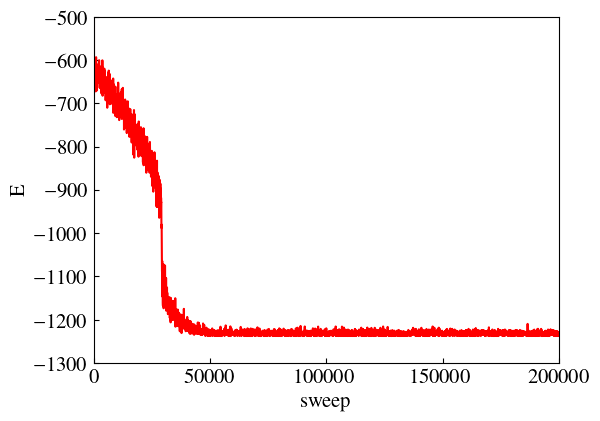

In [8]:
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['font.size'] = 15

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,newtxtext,newtxmath,bm}'
plt.rcParams['font.family'] = 'TeX Gyre Termes'

energy = pd.read_csv("dump/energy.dat", sep = r"\s+", skiprows = 2, dtype = np.float64, header = None)

fig, ax = plt.subplots()
ax.plot(energy[0], energy[1], c = "red")

ax.set_xlim(0, max_sweeps)
ax.set_ylim(-1300, -500)
ax.set_xlabel("sweep")
ax.set_ylabel("E")
ax.tick_params(direction = 'in', color = 'black')

plt.show()

### Plot spin configuration in the "dump" folder

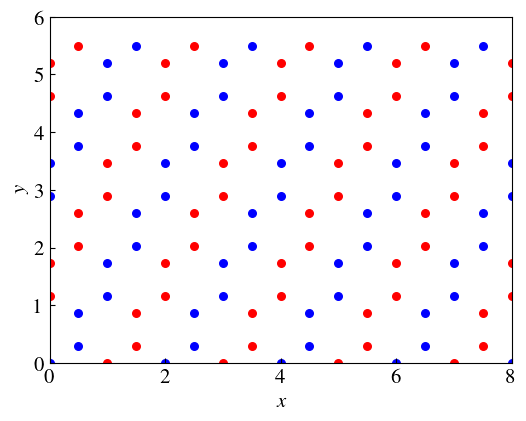

In [9]:
spin = pd.read_csv("dump/dump00019.dat.gz", sep = r"\s+", skiprows = 4, dtype = np.float64, header = None, compression = 'gzip')

coor_x = spin[1]
coor_y = spin[2]
mz = np.array(spin[5], dtype = np.int32)
colormap = {-1 : 'b', 1 : 'r'}

fig, ax = plt.subplots()
for mz_val in [-1, 1]:
    mask = mz == mz_val
    ax.scatter(coor_x[mask], coor_y[mask], s = 30, c = colormap[mz_val])

ax.set_aspect(1)
ax.set_xlim(0, 8)
ax.set_ylim(0, 6)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.tick_params(direction = 'in', color = 'black')

plt.show()